In [3]:
import numpy as np
import math
import random
import pandas as pd

#https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset

patterns = []
classes = []

filename = "C:\Python39\iris_data.txt"
file = open(filename,"r")

for line in file.readlines():
    row = line.strip().split(',')
    patterns.append(row[0:4])
    classes.append(row[4])
print("Iris Data Loaded")
file.close

patterns = np.asarray(patterns,dtype=np.float32)
print(patterns)

sample_no = np.random.randint(0,len(patterns))

print("Sample pattern: " + str(patterns[int(sample_no)]))
print("Class of the above pattern: " + str(classes[int(sample_no)]))

Iris Data Loaded
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 

In [4]:
# https://stackoverflow.com/questions/19163214/kohonen-self-organizing-maps-determining-the-number-of-neurons-and-grid-size

def mapunits(input_len,size='small'):
    
    heuristic_map_units = 5*input_len**0.54321
     
    if size == 'big':
        heuristic_map_units = 4*(heuristic_map_units)
    else:
        heuristic_map_units = 0.25*(heuristic_map_units)
        
    return heuristic_map_units
        
        
map_units = mapunits(len(patterns),size='big')
print("Heuristically computed appropriate no. of map units: "+str(int(map_units)))

Heuristically computed appropriate no. of map units: 304


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

input_dimensions = 4

map_width = 10
map_height = 10

MAP = np.random.uniform(size=(map_height,map_width,input_dimensions)) #create neurons with random weights
prev_MAP = np.zeros((map_height,map_width,input_dimensions))

radius0 = max(map_width,map_height)/5
learning_rate0 = 0.2

coordinate_map = np.zeros([map_height,map_width,2],dtype=np.int32)

for i in range(0,map_height):
    for j in range(0,map_width):
        coordinate_map[i][j] = [i,j]

epochs = 100
radius=radius0
learning_rate = learning_rate0
max_iterations = len(patterns)+1
too_many_iterations = 10*max_iterations

convergence = [1]

timestep=1
e=0.0001 
flag=0

epoch=0
while epoch<epochs: # for a number of epochs
    
    shuffle = np.random.randint(len(patterns), size=len(patterns))
    for i in range(len(patterns)): # for each input
        
        J = np.linalg.norm(MAP - prev_MAP) # calculate error how much changed

        if  J <= e: #if converged (convergence criteria)
            flag=1
            break
        else:
            pattern = patterns[shuffle[i]] #take random input
            pattern_ary = np.tile(pattern, (map_height, map_width, 1))
            Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2) # find weight to each neuron
            
            # Get the best matching unit(BMU) which is the one with the smallest Euclidean distance
            BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape) # get the best neuron possible
            prev_MAP = np.copy(MAP) # save map before
             
            for i in range(map_height):
                for j in range(map_width):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]]) # if its in neighbourhood
                    if distance <= radius: # check if in distance
                        MAP[i][j] = MAP[i][j] + learning_rate*(pattern-MAP[i][j]) # adjust map weight
            
            learning_rate = learning_rate0*(1-(epoch/epochs)) #adjust parameters
            radius = radius0*math.exp(-epoch/epochs)
            
            timestep+=1
    
    if J < min(convergence):
        print('Lower error found: %s' %str(J) + ' at epoch: %s' % str(epoch))
        print('\tLearning rate: ' + str(learning_rate))
        print('\tNeighbourhood radius: ' + str(radius))
        MAP_final = MAP
        
    convergence.append(J)
    
    if flag==1:
        break
    epoch+=1

Lower error found: 0.9180076180358658 at epoch: 0
	Learning rate: 0.2
	Neighbourhood radius: 2.0
Lower error found: 0.4883632476357884 at epoch: 3
	Learning rate: 0.194
	Neighbourhood radius: 1.9408910670970163
Lower error found: 0.3044714029621233 at epoch: 5
	Learning rate: 0.19
	Neighbourhood radius: 1.902458849001428
Lower error found: 0.1497057134357248 at epoch: 7
	Learning rate: 0.186
	Neighbourhood radius: 1.8647876398118965
Lower error found: 0.07388269310322132 at epoch: 18
	Learning rate: 0.16400000000000003
	Neighbourhood radius: 1.670540422822544
Lower error found: 0.059895964101009364 at epoch: 34
	Learning rate: 0.13199999999999998
	Neighbourhood radius: 1.4235406455252193
Lower error found: 0.059068085600519876 at epoch: 53
	Learning rate: 0.094
	Neighbourhood radius: 1.1772099393567104
Lower error found: 0.04519691824098153 at epoch: 54
	Learning rate: 0.092
	Neighbourhood radius: 1.1654965047479793
Lower error found: 0.0341950162582521 at epoch: 55
	Learning rate: 0.0

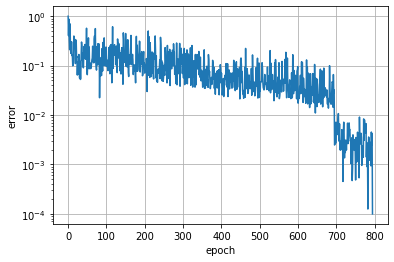

Number of timesteps: 119074
Final error: 9.933931741788827e-05


In [14]:
# Show a plot of the error at each epoch to show convergence, but this is guaranteed in SOM
# due to the learning rate and neighbourhood decay
plt.plot(convergence)
plt.ylabel('error')
plt.xlabel('epoch')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Number of timesteps: ' + str(timestep))
print('Final error: ' + str(J))

0 (7, 1)
1 (9, 2)
2 (8, 2)
3 (9, 3)
4 (7, 1)
5 (6, 0)
6 (7, 3)
7 (8, 1)
8 (8, 4)
9 (9, 2)
10 (6, 1)
11 (9, 1)
12 (9, 2)
13 (8, 3)
14 (5, 0)
15 (5, 0)
16 (5, 1)
17 (7, 1)
18 (4, 1)
19 (7, 0)
20 (5, 2)
21 (7, 0)
22 (7, 3)
23 (8, 0)
24 (9, 0)
25 (9, 2)
26 (8, 0)
27 (6, 2)
28 (6, 2)
29 (9, 3)
30 (9, 3)
31 (5, 2)
32 (6, 0)
33 (5, 0)
34 (9, 2)
35 (7, 2)
36 (5, 2)
37 (9, 2)
38 (8, 3)
39 (8, 1)
40 (7, 1)
41 (8, 4)
42 (8, 3)
43 (8, 0)
44 (7, 0)
45 (9, 2)
46 (7, 0)
47 (9, 3)
48 (6, 1)
49 (8, 1)
50 (3, 0)
51 (5, 4)
52 (3, 0)
53 (9, 7)
54 (5, 5)
55 (6, 8)
56 (4, 7)
57 (9, 5)
58 (5, 5)
59 (9, 7)
60 (9, 5)
61 (9, 9)
62 (7, 6)
63 (5, 7)
64 (7, 5)
65 (5, 4)
66 (5, 9)
67 (7, 7)
68 (6, 6)
69 (8, 7)
70 (4, 9)
71 (6, 4)
72 (0, 0)
73 (5, 7)
74 (6, 5)
75 (5, 4)
76 (3, 0)
77 (4, 6)
78 (5, 8)
79 (8, 6)
80 (8, 6)
81 (8, 6)
82 (7, 5)
83 (0, 1)
84 (6, 9)
85 (4, 8)
86 (3, 0)
87 (6, 6)
88 (8, 9)
89 (9, 7)
90 (6, 8)
91 (5, 7)
92 (7, 7)
93 (9, 5)
94 (7, 8)
95 (8, 9)
96 (8, 9)
97 (6, 5)
98 (8, 5)
99 (9, 8)
100 (0, 6)

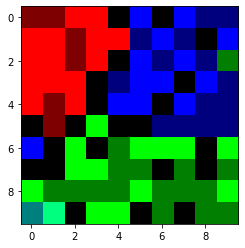

In [17]:
from PIL import Image
import numpy as np

BMU = np.zeros([2],dtype=np.int32)
result_map = np.zeros([map_height,map_width,3],dtype=np.float32)

i=0
for pattern in patterns: # for each input
    
    pattern_ary = np.tile(pattern, (map_height, map_width, 1)) 
    Eucli_MAP = np.linalg.norm(pattern_ary - MAP_final, axis=2) # calculate to which neuron this input is closest

    # Get the best matching unit(BMU) which is the one with the smallest Euclidean distance
    BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
    print(i, BMU)
    
    x = BMU[0]
    y = BMU[1]
    
    if classes[i] == 'Iris-setosa':
        if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5,0,0])
    elif classes[i] == 'Iris-virginica':
        if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0,0.5,0])
    elif classes[i] == 'Iris-versicolor':
        if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0,0,0.5])
    i+=1
result_map = np.flip(result_map,0)
    

print("Raudona = Iris-Setosa")
print("Melyna = Iris-Virginica")
print("Žalia = Iris-Versicolor")

plt.imshow(result_map, interpolation='nearest')

In [221]:
p = 0
for i in range(map_height):
    print()
    for j in range(map_width):
        print (MAP[i][j], result_map[i][j])

        



[7.5263342  3.1645693  6.36844802 2.13690424] [0. 1. 0.]
[7.43370569 3.12906642 6.25644908 2.07506745] [0.  0.5 0. ]
[7.28055872 3.03466407 6.01361369 1.93860374] [0.  0.5 0.5]
[7.02478995 3.05255682 5.46414432 1.77574333] [0.  0.  0.5]
[6.94678283 3.07219392 5.10129032 1.54838114] [0.  0.  0.5]
[6.20064446 3.43250988 3.18915606 0.86423513] [0. 0. 1.]
[5.62064906 3.81149331 1.80997368 0.37883163] [0.  0.5 0.5]
[5.46207302 3.83736439 1.48264293 0.26395427] [0. 0. 1.]
[5.38228519 3.88024442 1.46294999 0.26637681] [0. 0. 0.]
[5.3310073  3.8516814  1.44857716 0.26330427] [0.  0.  0.5]

[7.23701008 3.20237532 6.13173054 2.22964574] [0. 1. 0.]
[7.207504   3.14862044 6.05028729 2.13847953] [0. 0. 0.]
[6.90517923 3.10694422 5.66253173 2.08853431] [0. 1. 0.]
[6.9527485  3.0370838  5.37827787 1.80621829] [0. 0. 1.]
[6.71729591 3.10610459 4.8337609  1.67630156] [0. 0. 1.]
[6.30383189 3.27875472 3.724366   1.06420172] [0. 0. 1.]
[5.45009333 3.61378758 1.70092379 0.33227773] [0.  0.  0.5]
[5.37692